# Import data

In [1]:
import pandas as pd
import re
import os
pd.set_option('display.max_columns', None)

In [2]:
data_path = os.path.join(os.path.expanduser('~'), "code", "jotanavarrete","goalguru", "data", "processed_data")
matches_cleaned = pd.read_csv(os.path.join(data_path, 'soccer_match', 'soccer_match-matches_processed.csv'))
X_processed =  pd.read_csv(os.path.join(data_path, 'soccer_match', 'soccer_match-X_processed.csv'))
y_processed = pd.read_csv(os.path.join(data_path, 'soccer_match', 'soccer_match-y_processed.csv'))

In [3]:
features =['competitionId','last_10_home_as_home_avg_pass_accu',
       'last_10_home_as_home_avg_shot_accu',
       'last_10_home_as_home_avg_total_passes',
       'last_10_home_as_home_avg_total_accu_passes',
       'last_10_home_as_home_avg_total_shots',
       'last_10_home_as_home_avg_total_accu_shots',
       'last_10_home_as_home_avg_total_goals',
       'last_10_home_as_home_avg_total_goals_in',
       'last_10_home_as_home_avg_matchranks',
       'last_10_home_as_home_total_wins', 'last_10_home_as_home_total_draws',
       'last_10_home_as_home_total_loses', 'last_10_home_as_home_win_ratio',
       'last_10_home_as_away_avg_pass_accu',
       'last_10_home_as_away_avg_shot_accu',
       'last_10_home_as_away_avg_total_passes',
       'last_10_home_as_away_avg_total_accu_passes',
       'last_10_home_as_away_avg_total_shots',
       'last_10_home_as_away_avg_total_accu_shots',
       'last_10_home_as_away_avg_total_goals',
       'last_10_home_as_away_avg_total_goals_in',
       'last_10_home_as_away_avg_matchranks',
       'last_10_home_as_away_total_wins', 'last_10_home_as_away_total_draws',
       'last_10_home_as_away_total_loses', 'last_10_home_as_away_win_ratio',
       'last_10_away_as_home_avg_pass_accu',
       'last_10_away_as_home_avg_shot_accu',
       'last_10_away_as_home_avg_total_passes',
       'last_10_away_as_home_avg_total_accu_passes',
       'last_10_away_as_home_avg_total_shots',
       'last_10_away_as_home_avg_total_accu_shots',
       'last_10_away_as_home_avg_total_goals',
       'last_10_away_as_home_avg_total_goals_in',
       'last_10_away_as_home_avg_matchranks',
       'last_10_away_as_home_total_wins', 'last_10_away_as_home_total_draws',
       'last_10_away_as_home_total_loses', 'last_10_away_as_home_win_ratio',
       'last_10_away_as_away_avg_pass_accu',
       'last_10_away_as_away_avg_shot_accu',
       'last_10_away_as_away_avg_total_passes',
       'last_10_away_as_away_avg_total_accu_passes',
       'last_10_away_as_away_avg_total_shots',
       'last_10_away_as_away_avg_total_accu_shots',
       'last_10_away_as_away_avg_total_goals',
       'last_10_away_as_away_avg_total_goals_in',
       'last_10_away_as_away_avg_matchranks',
       'last_10_away_as_away_total_wins', 'last_10_away_as_away_total_draws',
       'last_10_away_as_away_total_loses', 'last_10_away_as_away_win_ratio',
       'avgHomePassAccuLast10Games','avgHomeShotAccuLast10Games',
       'avgAwayPassAccuLast10Games','avgAwayShotAccuLast10Games',
       'homeWRlast10Games', 'awayWRlast10Games',
       'homeLast10AvgRank', 'awayLast10AvgRank'
       ]

In [4]:
matches_cleaned.head(3)

,Unnamed: 0,dateutc,competitionId,seasonId,gameweek,matchId,winner,homeId,awayId,totalHomePasses,accurateHomePasses,totalHomeShots,accurateHomeShots,totalAwayPasses,accurateAwayPasses,totalAwayShots,accurateAwayShots,homeTeam,awayTeam,homeTeam_matchRank,awayTeam_matchRank,homeScore,awayScore,homePassAccuracy,homeShotAccuracy,awayPassAccuracy,awayShotAccuracy,homeWins,last_10_home_avg_pass_accu,last_10_home_avg_shot_accu,last_10_home_avg_total_passes,last_10_home_avg_total_accu_passes,last_10_home_avg_total_shots,last_10_home_avg_total_accu_shots,last_10_home_avg_total_goals,last_10_home_avg_total_goals_in,last_10_home_avg_matchranks,last_10_home_total_wins,last_10_home_total_loses,last_10_home_total_draws,last_10_home_win_ratio,last_10_away_avg_pass_accu,last_10_away_avg_shot_accu,last_10_away_avg_total_passes,last_10_away_avg_total_accu_passes,last_10_away_avg_total_shots,last_10_away_avg_total_accu_shots,last_10_away_avg_total_goals,last_10_away_avg_total_goals_in,last_10_away_avg_matchranks,last_10_away_total_wins,last_10_away_total_loses,last_10_away_total_draws,last_10_away_win_ratio
0,0,2018-05-20 18:45:00,524,181248,38,2576335,3161,3162,3161,302,249,14,4,492,417,14,6,Lazio,Internazionale,0.01185,0.00595,2,3,0.824503,0.285714,0.847561,0.428571,-1,0.827755,0.372103,470.100000,391.5,14.600000,5.800000,2.300000,1.200000,0.004582,5.0,5.0,0.0,0.5,0.864880,0.391410,597.708333,517.75,15.541667,5.916667,2.166667,0.791667,0.007612,5.0,2.0,3.0,0.5
1,58,2018-05-20 18:45:00,524,181248,38,2576336,3158,3315,3158,337,262,14,3,500,423,15,6,Sassuolo,Roma,0.00700,0.02564,0,1,0.777448,0.214286,0.846000,0.400000,-1,0.743128,0.401759,307.541667,233.5,11.041667,4.291667,1.291667,1.041667,0.005160,5.0,4.0,1.0,0.5,0.837718,0.321219,510.100000,428.20,14.300000,4.900000,1.600000,0.500000,0.007135,6.0,3.0,1.0,0.6
2,45,2018-05-20 16:00:00,524,181248,38,2576337,3204,3204,3164,363,315,14,5,446,386,9,3,SPAL,Sampdoria,0.01320,0.00801,3,1,0.867769,0.357143,0.865471,0.333333,1,0.797702,0.332452,333.100000,268.2,7.200000,2.500000,0.900000,0.900000,0.010732,2.0,6.0,2.0,0.2,0.845641,0.262143,470.100000,400.20,9.600000,2.700000,0.800000,1.900000,0.006874,3.0,1.0,6.0,0.3


# Model training

### Defining variables

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as opti
import numpy as np

2023-09-12 10:28:19.457725: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-12 10:28:19.618983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-12 10:28:19.621412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 10:28:20.809255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
y = y_processed['homeWins']

In [7]:
y.shape

(1865,)

In [8]:
y1 = pd.get_dummies(y,prefix = 'Class', dtype = int)

In [9]:
y1.shape

(1865, 3)

In [10]:
y.value_counts()

homeWins
 1    836
-1    571
 0    458
Name: count, dtype: int64

In [102]:
X0 = X_processed.copy()
X0 = pd.concat([matches_cleaned['competitionId'], X_processed], axis = 1)

In [103]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(X0[['competitionId']])
X_encoded = pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out(['competitionId']))
X0 = pd.concat([X0,X_encoded], axis = 1).dropna().drop(columns = ['competitionId'])

In [104]:
X0.shape

(1865, 33)

In [106]:
X0

,last_10_home_avg_pass_accu,last_10_home_avg_shot_accu,last_10_home_avg_total_passes,last_10_home_avg_total_accu_passes,last_10_home_avg_total_shots,last_10_home_avg_total_accu_shots,last_10_home_avg_total_goals,last_10_home_avg_total_goals_in,last_10_home_avg_matchranks,last_10_home_total_wins,last_10_home_total_draws,last_10_home_total_loses,last_10_home_win_ratio,last_10_away_avg_pass_accu,last_10_away_avg_shot_accu,last_10_away_avg_total_passes,last_10_away_avg_total_accu_passes,last_10_away_avg_total_shots,last_10_away_avg_total_accu_shots,last_10_away_avg_total_goals,last_10_away_avg_total_goals_in,last_10_away_avg_matchranks,last_10_away_total_wins,last_10_away_total_draws,last_10_away_total_loses,last_10_away_win_ratio,competitionId_28,competitionId_102,competitionId_364,competitionId_412,competitionId_426,competitionId_524,competitionId_795
0,0.827755,0.372103,470.100000,391.500000,14.600000,5.800000,2.300000,1.200000,0.004582,5.0,0.0,5.0,0.5,0.864880,0.391410,597.708333,517.750000,15.541667,5.916667,2.166667,0.791667,0.007612,5.0,3.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.743128,0.401759,307.541667,233.500000,11.041667,4.291667,1.291667,1.041667,0.005160,5.0,1.0,4.0,0.5,0.837718,0.321219,510.100000,428.200000,14.300000,4.900000,1.600000,0.500000,0.007135,6.0,1.0,3.0,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.797702,0.332452,333.100000,268.200000,7.200000,2.500000,0.900000,0.900000,0.010732,2.0,2.0,6.0,0.2,0.845641,0.262143,470.100000,400.200000,9.600000,2.700000,0.800000,1.900000,0.006874,3.0,6.0,1.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.793040,0.315463,344.600000,274.300000,11.200000,3.700000,1.000000,2.300000,0.006705,1.0,8.0,1.0,0.1,0.801427,0.302174,366.200000,294.000000,7.800000,2.400000,0.700000,1.200000,0.007475,1.0,6.0,3.0,0.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.759732,0.262008,353.500000,270.458333,8.458333,2.083333,0.666667,1.750000,0.011098,3.0,6.0,1.0,0.3,0.841408,0.372831,492.458333,416.166667,17.375000,6.166667,2.000000,0.666667,0.002556,5.0,1.0,4.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [107]:
#Corr matrix
#correlation_matrix = pd.DataFrame(X0).corr()
#column_names = correlation_matrix.columns
#Creating corr df
#corr_df = correlation_matrix.stack().reset_index()
#corr_df.columns = ['feature1','feature2', 'correlation']
#Remove self corr
#no_self_correlation = (corr_df['feature1'] != corr_df['feature2'])
#corr_df = corr_df[no_self_correlation]
#Compute absolute correlation
#corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])
#Showing the top 5 most correlated pair of features
#corr_df[corr_df['absolute_correlation']>0.1].sort_values(by='absolute_correlation', ascending = False)#.feature1.value_counts()


In [108]:
cols_to_drop = ['last_10_away_avg_total_goals', 'last_10_home_avg_total_goals',
                'last_10_away_avg_total_goals_in', 'last_10_home_avg_total_goals_in',
                'last_10_home_avg_total_accu_passes','last_10_away_avg_total_accu_passes',
                'last_10_away_total_wins', 'last_10_home_total_wins',
                'last_10_away_avg_total_passes', 'last_10_home_avg_total_passes',
                'last_10_away_avg_total_shots', 'last_10_home_avg_total_shots',
                'last_10_away_total_loses', 'last_10_home_total_loses',
                'last_10_home_avg_pass_accu', 'last_10_away_avg_pass_accu',
                'last_10_home_avg_shot_accu', 'last_10_away_avg_shot_accu',
                'last_10_home_avg_total_accu_shots', 'last_10_away_avg_total_accu_shots',
                'last_10_home_total_draws', 'last_10_away_total_draws'
               ]
                

In [109]:
X = X0.copy()
#X = X0.drop(columns = cols_to_drop).copy()

In [110]:
X.head(5)

,last_10_home_avg_pass_accu,last_10_home_avg_shot_accu,last_10_home_avg_total_passes,last_10_home_avg_total_accu_passes,last_10_home_avg_total_shots,last_10_home_avg_total_accu_shots,last_10_home_avg_total_goals,last_10_home_avg_total_goals_in,last_10_home_avg_matchranks,last_10_home_total_wins,last_10_home_total_draws,last_10_home_total_loses,last_10_home_win_ratio,last_10_away_avg_pass_accu,last_10_away_avg_shot_accu,last_10_away_avg_total_passes,last_10_away_avg_total_accu_passes,last_10_away_avg_total_shots,last_10_away_avg_total_accu_shots,last_10_away_avg_total_goals,last_10_away_avg_total_goals_in,last_10_away_avg_matchranks,last_10_away_total_wins,last_10_away_total_draws,last_10_away_total_loses,last_10_away_win_ratio,competitionId_28,competitionId_102,competitionId_364,competitionId_412,competitionId_426,competitionId_524,competitionId_795
0,0.827755,0.372103,470.100000,391.500000,14.600000,5.800000,2.300000,1.200000,0.004582,5.0,0.0,5.0,0.5,0.864880,0.391410,597.708333,517.750000,15.541667,5.916667,2.166667,0.791667,0.007612,5.0,3.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.743128,0.401759,307.541667,233.500000,11.041667,4.291667,1.291667,1.041667,0.005160,5.0,1.0,4.0,0.5,0.837718,0.321219,510.100000,428.200000,14.300000,4.900000,1.600000,0.500000,0.007135,6.0,1.0,3.0,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.797702,0.332452,333.100000,268.200000,7.200000,2.500000,0.900000,0.900000,0.010732,2.0,2.0,6.0,0.2,0.845641,0.262143,470.100000,400.200000,9.600000,2.700000,0.800000,1.900000,0.006874,3.0,6.0,1.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.793040,0.315463,344.600000,274.300000,11.200000,3.700000,1.000000,2.300000,0.006705,1.0,8.0,1.0,0.1,0.801427,0.302174,366.200000,294.000000,7.800000,2.400000,0.700000,1.200000,0.007475,1.0,6.0,3.0,0.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.759732,0.262008,353.500000,270.458333,8.458333,2.083333,0.666667,1.750000,0.011098,3.0,6.0,1.0,0.3,0.841408,0.372831,492.458333,416.166667,17.375000,6.166667,2.000000,0.666667,0.002556,5.0,1.0,4.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train-test split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 40)

In [112]:
#for pca
#X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.3, random_state = 40)

In [113]:
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
reduced_x_train = pd.DataFrame(data = pca.fit_transform(X_train), columns = cols)
reduced_x_test = pd.DataFrame(data = pca.transform(X_test), columns = cols)
#scaler = RobustScaler()
#reduced_x_train = pd.DataFrame(scaler.fit_transform(reduced_x_train))
#reduced_x_test = pd.DataFrame(scaler.transform(reduced_x_test))

<Axes: >

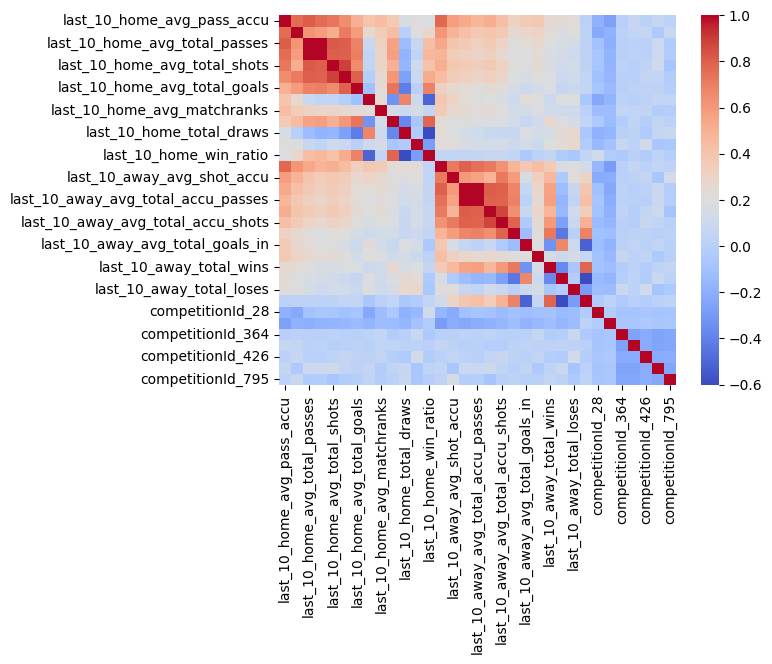

In [115]:
sns.heatmap(pd.DataFrame(X_train).corr(), cmap='coolwarm')

In [117]:
X_train

,last_10_home_avg_pass_accu,last_10_home_avg_shot_accu,last_10_home_avg_total_passes,last_10_home_avg_total_accu_passes,last_10_home_avg_total_shots,last_10_home_avg_total_accu_shots,last_10_home_avg_total_goals,last_10_home_avg_total_goals_in,last_10_home_avg_matchranks,last_10_home_total_wins,last_10_home_total_draws,last_10_home_total_loses,last_10_home_win_ratio,last_10_away_avg_pass_accu,last_10_away_avg_shot_accu,last_10_away_avg_total_passes,last_10_away_avg_total_accu_passes,last_10_away_avg_total_shots,last_10_away_avg_total_accu_shots,last_10_away_avg_total_goals,last_10_away_avg_total_goals_in,last_10_away_avg_matchranks,last_10_away_total_wins,last_10_away_total_draws,last_10_away_total_loses,last_10_away_win_ratio,competitionId_28,competitionId_102,competitionId_364,competitionId_412,competitionId_426,competitionId_524,competitionId_795
656,0.844120,0.331914,455.833333,389.166667,11.833333,3.833333,1.333333,1.833333,0.003982,2.0,2.0,2.0,0.333333,0.803416,0.227964,394.333333,317.500000,10.500000,2.166667,1.000000,0.333333,0.006160,3.0,0.0,3.0,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1249,0.844027,0.425589,480.000000,406.291667,11.416667,4.791667,1.541667,1.833333,0.006908,4.0,5.0,1.0,0.400000,0.731701,0.384555,299.125000,221.166667,8.500000,3.458333,1.083333,1.000000,0.006209,4.0,3.0,3.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1305,0.853304,0.395979,495.416667,423.250000,10.958333,4.333333,1.333333,1.583333,0.005612,5.0,5.0,0.0,0.500000,0.789742,0.387918,353.200000,282.000000,7.500000,2.200000,0.700000,1.800000,0.007305,1.0,5.0,4.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1137,0.708577,0.392987,266.000000,188.800000,7.200000,2.600000,0.900000,0.900000,0.008259,3.0,5.0,2.0,0.300000,0.785514,0.365038,390.400000,312.900000,10.000000,3.400000,0.800000,1.000000,0.008600,2.0,2.0,6.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.850203,0.388315,451.833333,384.500000,12.166667,4.666667,1.500000,1.666667,0.010522,3.0,2.0,1.0,0.500000,0.759270,0.357092,293.000000,227.166667,7.500000,2.666667,1.333333,2.000000,0.008097,2.0,3.0,1.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0
165,0.824609,0.351579,425.900000,352.200000,12.200000,4.200000,1.300000,1.000000,0.006129,2.0,1.0,7.0,0.200000,0.804081,0.297540,361.900000,293.400000,11.500000,3.700000,0.900000,1.700000,0.006339,2.0,7.0,1.0,0.200000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.876252,0.398878,530.916667,466.166667,12.375000,4.875000,1.291667,1.166667,0.010062,3.0,2.0,5.0,0.300000,0.817836,0.384939,425.600000,352.000000,13.000000,4.600000,1.700000,0.900000,0.006794,6.0,3.0,1.0,0.600000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
219,0.851244,0.340853,516.300000,442.300000,16.900000,5.900000,1.500000,0.600000,0.002857,7.0,1.0,2.0,0.700000,0.804178,0.378137,403.200000,325.900000,11.000000,4.300000,1.200000,1.900000,0.011265,3.0,5.0,2.0,0.300000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [118]:
#reduced_x_train

In [119]:
from mpl_toolkits.mplot3d import Axes3D

In [121]:
#fig, ax = plt.subplots(1,2, subplot_kw = {'projection' : '3d'}, figsize=(12,10))
#ax[0].scatter(X_train.iloc[:,0], X_train.iloc[:,1], X_train.iloc[:,20], c = y_train);
#ax[0].set_title('X1 vs. X0 before PCA (initial space)'); ax[0].set_xlabel('X0'); ax[0].set_ylabel('X1'); ax[0].set_zlabel('x2')


#ax[1].scatter(reduced_x_train.iloc[:,0], reduced_x_train.iloc[:,1], reduced_x_train.iloc[:,2], c = y_train);
#ax[1].set_title('PC1 vs PC2 (new space)'); ax[1].set_xlabel('PC 1'); ax[1].set_ylabel('PC 2'); ax[1].set_zlabel('PC 3');

In [122]:
y_train = pd.get_dummies(y_train,prefix = 'Class', dtype = int)
y_test = pd.get_dummies(y_test,prefix = 'Class', dtype = int)

In [123]:
X.keys()

Index(['last_10_home_avg_pass_accu', 'last_10_home_avg_shot_accu',
       'last_10_home_avg_total_passes', 'last_10_home_avg_total_accu_passes',
       'last_10_home_avg_total_shots', 'last_10_home_avg_total_accu_shots',
       'last_10_home_avg_total_goals', 'last_10_home_avg_total_goals_in',
       'last_10_home_avg_matchranks', 'last_10_home_total_wins',
       'last_10_home_total_draws', 'last_10_home_total_loses',
       'last_10_home_win_ratio', 'last_10_away_avg_pass_accu',
       'last_10_away_avg_shot_accu', 'last_10_away_avg_total_passes',
       'last_10_away_avg_total_accu_passes', 'last_10_away_avg_total_shots',
       'last_10_away_avg_total_accu_shots', 'last_10_away_avg_total_goals',
       'last_10_away_avg_total_goals_in', 'last_10_away_avg_matchranks',
       'last_10_away_total_wins', 'last_10_away_total_draws',
       'last_10_away_total_loses', 'last_10_away_win_ratio',
       'competitionId_28', 'competitionId_102', 'competitionId_364',
       'competitionId_412'

In [136]:
def initialize_model():

    optimizer = opti.Adam(learning_rate=0.001)
    
    model = Sequential()
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(80, input_dim = X_train.shape[-1], activation = 'relu'))
    
    model.add(layers.Dense(20, activation = 'relu'))
    model.add(layers.Dense(6, activation = 'relu'))
    model.add(layers.Dense(6, activation = 'relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(4, activation = 'relu'))
    #model.add(layers.Dropout(0.1))
    model.add(layers.Dense(3, activation = 'softmax'))


    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = optimizer,
        metrics = 'accuracy'
    )

    return model

In [137]:
es = EarlyStopping(
        monitor="val_loss",
        patience=100,
        restore_best_weights=True
    )

model = initialize_model()
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    shuffle = True,
    epochs = 200,
    batch_size =  64,
    verbose = 0,
    callbacks = es
)

In [138]:
model.evaluate(X_test, y_test,
               verbose = 0)[1]

0.5267857313156128

# Fine Tunning

In [433]:
X = X0.copy()

In [434]:
y_1 = matches_cleaned['homeWins']

In [647]:
accuracys = []
params_list = []

### Train - test split for PCA and scalation

In [1429]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y_1, test_size=0.3)

In [1431]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 16)
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15','PC16']
X_train_1 = pd.DataFrame(data = pca.fit_transform(X_train_1), columns = cols)
X_test_1 = pd.DataFrame(data = pca.transform(X_test_1), columns = cols)
scaler = RobustScaler()
X_train_1 = pd.DataFrame(scaler.fit_transform(reduced_x_train))
X_test_1 = pd.DataFrame(scaler.transform(reduced_x_test))

### Train - test split and scalation

In [1267]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y_1, test_size=0.3)

In [1268]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

## Model

In [1235]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [1236]:
params = {
    "loss" : ["hinge", "modified_huber"],
    "alpha" : [0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", None],
}
clf = SGDClassifier(max_iter=10000)
grid = GridSearchCV(clf, param_grid=params, cv=5, n_jobs = -1)


grid.fit(X_train_scaled, y_train_1)

GridSearchCV(cv=5, estimator=SGDClassifier(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1],
                         'loss': ['hinge', 'modified_huber'],
                         'penalty': ['l2', 'l1', 'elasticnet', None]})

In [1237]:
y_pred_1 = grid.predict(X_test_scaled)
accuracys.append(accuracy_score(y_test_1, y_pred_1))
params_list.append(grid.best_params_)
print(accuracy_score(y_test_1, y_pred_1))
print(grid.best_params_)

0.5214285714285715
{'alpha': 0.01, 'loss': 'hinge', 'penalty': None}


In [1240]:
alphas = []
losses = []
penalties = []
for params in params_list:
    alphas.append(params['alpha'])
    losses.append(params['loss'])
    penalties.append(params['penalty'])

In [1244]:
grid_search_df = pd.DataFrame(columns = ['alpha', 'loss', 'penalty', 'accuracy'])

In [1248]:
grid_search_df['alpha'] = alphas
grid_search_df['loss'] = losses
grid_search_df['penalty'] = penalties
grid_search_df['accuracy'] = accuracys

In [1254]:
grid_search_df.penalty.value_counts()

penalty
elasticnet    30
l2            30
l1            19
Name: count, dtype: int64

# Final Model

### Train - test split and scalation

In [1435]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y_1, test_size=0.3)

In [1436]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

### Model Fit

In [1437]:
clf_final = SGDClassifier(loss = 'modified_huber', penalty = 'elasticnet', alpha = 0.1 ,max_iter=10000)

In [1438]:
clf_final.fit(X_train_scaled, y_train_1)

SGDClassifier(alpha=0.1, loss='modified_huber', max_iter=10000,
              penalty='elasticnet')

### Model Score

In [1439]:
y_pred_2 = clf_final.predict(X_test_scaled)
print(accuracy_score(y_test_1, y_pred_2))

0.5178571428571429
